In [1]:
# import
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Read data & create the header

In [2]:
df = pd.read_excel('Cleaned_NZ_Admin_JOBS_24_01.xlsx',sheet_name='Sheet1')
df.head()

,Job,URL,Company,Classification,Sub-classification,Region,City,Salary Info,Lowest Salary,Higest Salary,Posted Date (Days Ago)
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Administration & Office Support,Office Management,Bay of Plenty,Tauranga,NO DATA,44617,47199,0
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Administration & Office Support,Receptionists,Bay of Plenty,Tauranga,NO DATA,51532,53689,0
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Administration & Office Support,Other,Auckland,NO DATA,NO DATA,39819,49813,4
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Administration & Office Support,Administrative Assistants,Southland,Invercargill,NO DATA,41956,46808,0
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,Administration & Office Support,Client & Sales Administration,Canterbury,Christchurch,NO DATA,42246,45130,4


In [3]:
job_list = df.Job.unique()[:5]
job_list

array(['Administrator', 'Receptionist', 'Prosecutions Support Officer',
       'Early Childhood Centre Administrator',
       'Business Support Administrator'], dtype=object)

### Normalisation

In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
df_norm = df
df_norm[['Lowest Salary', 'Higest Salary', 'Posted Date (Days Ago)']] = min_max_scaler.fit_transform(df_norm[['Lowest Salary', 'Higest Salary', 'Posted Date (Days Ago)']])
df_norm.head()

,Job,URL,Company,Classification,Sub-classification,Region,City,Salary Info,Lowest Salary,Higest Salary,Posted Date (Days Ago)
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Administration & Office Support,Office Management,Bay of Plenty,Tauranga,NO DATA,0.258964,0.244385,0.000000
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Administration & Office Support,Receptionists,Bay of Plenty,Tauranga,NO DATA,0.317605,0.292274,0.000000
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Administration & Office Support,Other,Auckland,NO DATA,NO DATA,0.218275,0.263673,0.133333
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Administration & Office Support,Administrative Assistants,Southland,Invercargill,NO DATA,0.236398,0.241499,0.000000
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,Administration & Office Support,Client & Sales Administration,Canterbury,Christchurch,NO DATA,0.238857,0.229117,0.133333


### Standardisation

In [5]:
standard_scaler = preprocessing.StandardScaler()
df_stan = df
df_stan[['Lowest Salary', 'Higest Salary', 'Posted Date (Days Ago)']] = standard_scaler.fit_transform(df_stan[['Lowest Salary', 'Higest Salary', 'Posted Date (Days Ago)']])
df_stan.head()

,Job,URL,Company,Classification,Sub-classification,Region,City,Salary Info,Lowest Salary,Higest Salary,Posted Date (Days Ago)
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Administration & Office Support,Office Management,Bay of Plenty,Tauranga,NO DATA,-0.082404,-0.467219,-2.383845
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Administration & Office Support,Receptionists,Bay of Plenty,Tauranga,NO DATA,0.906696,0.518117,-2.383845
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,Administration & Office Support,Other,Auckland,NO DATA,NO DATA,-0.768694,-0.070352,-1.924202
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,Administration & Office Support,Administrative Assistants,Southland,Invercargill,NO DATA,-0.463024,-0.526583,-2.383845
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,Administration & Office Support,Client & Sales Administration,Canterbury,Christchurch,NO DATA,-0.421544,-0.781343,-1.924202


### Study from salary

1. Salary distribution comparison for different jobs

In [6]:
job_av_salary = df.groupby('Job').mean()[["Lowest Salary", "Higest Salary"]]
job_av_salary = job_av_salary.head()
job_av_salary["Job Code"]=["001","002","003","004","005"]
job_av_salary

,Lowest Salary,Higest Salary,Job Code
Job,,,
9 month Fixed Term Contract - Office Administrator - Part-time,0.253161,0.707290,001
ACC Contract Coordinator,-0.830057,-0.915251,002
ACCOUNTS ADMINISTRATOR,-0.789864,-0.273492,003
ACES Administrator,0.480017,0.253033,004
ADMINISTRATION SPECIALIST - CONSTRUCTION,-1.300934,-1.330034,005


[Text(0,0,'001'),
 Text(0,0,'002'),
 Text(0,0,'003'),
 Text(0,0,'004'),
 Text(0,0,'005')]

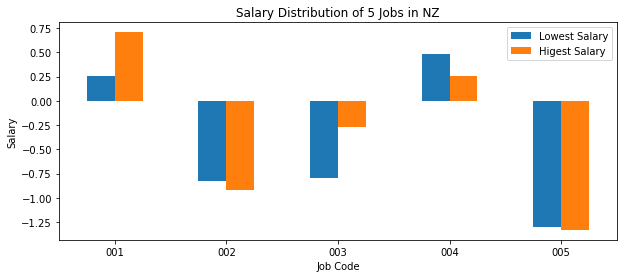

In [7]:
plot = job_av_salary.plot.bar(rot=0, figsize=(10,4))
plt.xlabel('Job Code')
plt.ylabel('Salary')
plt.title('Salary Distribution of 5 Jobs in NZ')
plot.set_xticklabels(["001","002","003","004","005"])

2. Salary distribution in different city (5 cities)

In [8]:
city_av_salary = df.groupby('City').mean()[["Lowest Salary", "Higest Salary"]]
city_av_salary = city_av_salary.head()
city_av_salary

,Lowest Salary,Higest Salary
City,,
Auckland Central,0.032377,0.010410
Blenheim,-0.710621,0.285068
Christchurch,-0.091124,-0.048495
Dunedin,0.005850,-0.055524
Gisborne,-0.491453,-0.665691


Text(0.5,1,'Salary Distribution in 5 Cities')

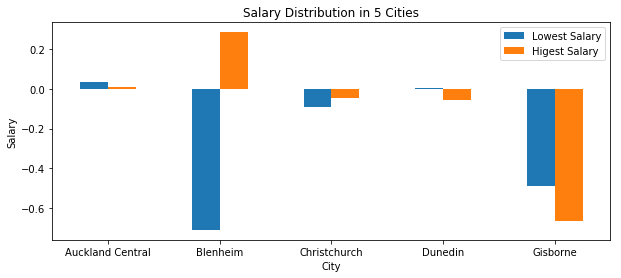

In [9]:
plot = city_av_salary.plot.bar(rot=0, figsize=(10,4))
plt.xlabel('City')
plt.ylabel('Salary')
plt.title('Salary Distribution in 5 Cities')

3. Salary changes over time

In [10]:
# auc_data = df[df["City"] == "Tauranga"]
# auc_data = auc_data.groupby('Posted Date (Days Ago)').mean()
# auc_data.head()

In [11]:
def ave_salary_city(df, city):
    auc_data = df[df["City"] == city]
    auc_data = auc_data.groupby('Posted Date (Days Ago)').mean()
    return auc_data

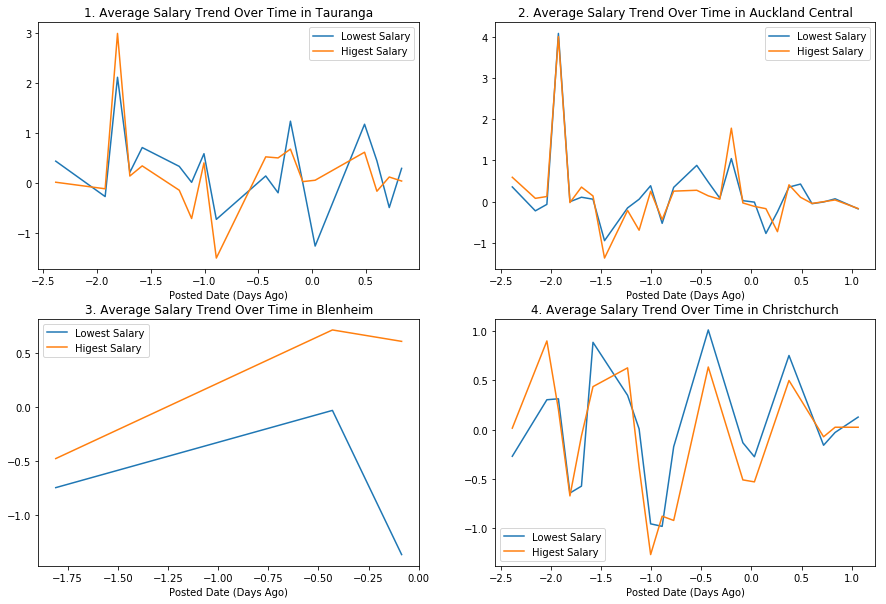

In [12]:
trend1 = ave_salary_city(df, "Tauranga")
trend2 = ave_salary_city(df, "Auckland Central")
trend3 = ave_salary_city(df, "Blenheim")
trend4 = ave_salary_city(df, "Christchurch")

fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(15,10))

trend1.plot(ax=axes[0,0])
trend2.plot(ax=axes[0,1])
trend3.plot(ax=axes[1,0])
trend4.plot(ax=axes[1,1])
axes[0,0].title.set_text('1. Average Salary Trend Over Time in Tauranga')
axes[0,1].title.set_text('2. Average Salary Trend Over Time in Auckland Central')
axes[1,0].title.set_text('3. Average Salary Trend Over Time in Blenheim')
axes[1,1].title.set_text('4. Average Salary Trend Over Time in Christchurch')

In [13]:
# auc_data.plot()
# plt.ylabel('Salary')
# plt.title('Average Salary Trend Over Time in Tauranga')

### Study from location

1. Market size for different locations (job size bar chart)

In [14]:
job_counts_region = df.groupby('Region').count()["Job"].sort_values()
job_counts_region.columns = ["Count"]
job_counts_region.head()

Region
West Coast     1
Gisborne       4
Marlborough    4
Southland      7
Tasman         8
Name: Job, dtype: int64

Text(0.5,1,'Market Size of Different Regions')

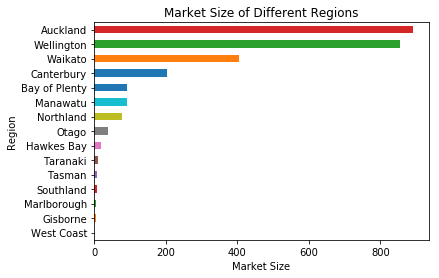

In [15]:
plot = job_counts_region.plot.barh()
plt.xlabel('Market Size')
plt.ylabel('Region')
plt.title('Market Size of Different Regions')

2. Job distribution in different region (pie)

In [16]:
def job_distribution_by_region(df, region):
    jobs_in_region = df[df["Region"] == region]
    job_counts_in_region = jobs_in_region.groupby('Job').count()["Company"]
    job_counts_in_region.columns = ["Count"]
    job_counts_major_in_region = job_counts_in_region[job_counts_in_region >= 70]
    job_counts_minor_in_region = job_counts_in_region[job_counts_in_region < 70].count()
    job_counts_major_in_region.loc["Others"] = job_counts_minor_in_region
    return job_counts_major_in_region

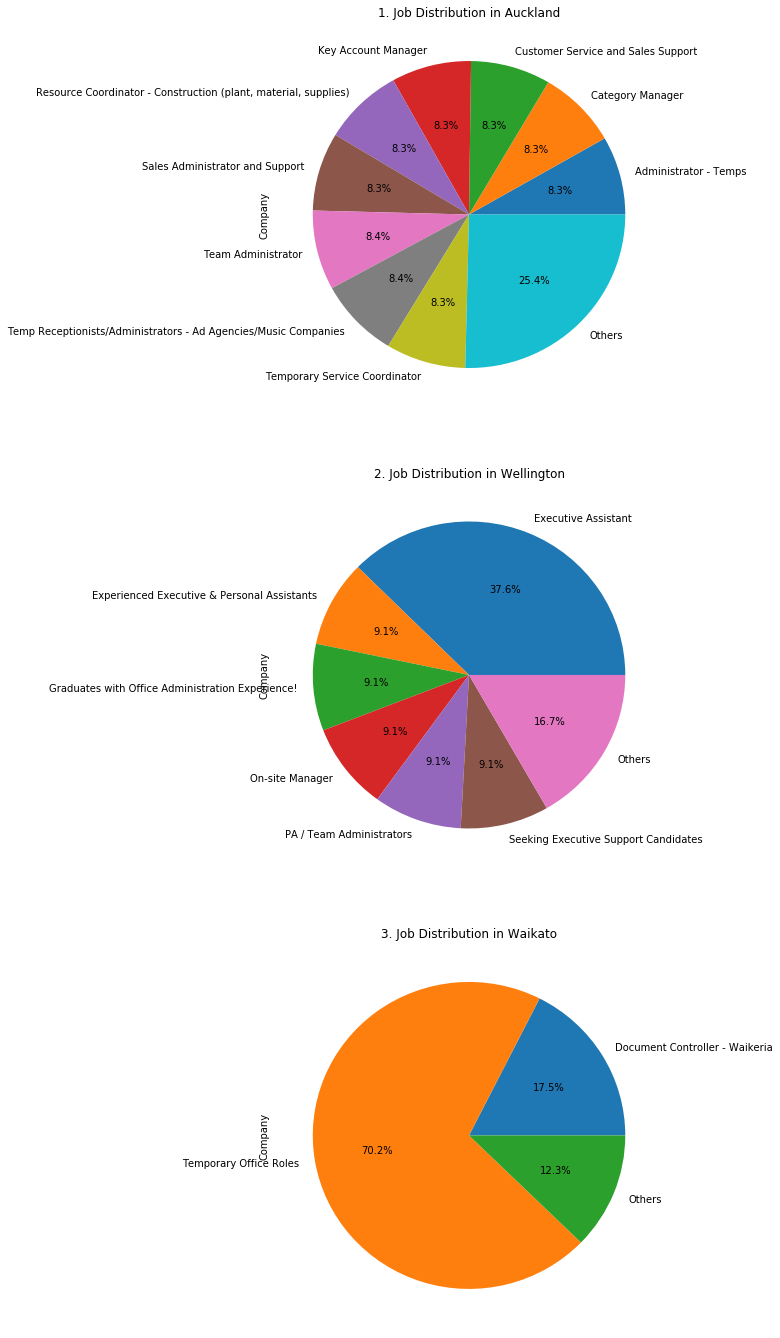

In [17]:
df1 = job_distribution_by_region(df, "Auckland")
df2 = job_distribution_by_region(df, "Wellington")
df3 = job_distribution_by_region(df, "Waikato")

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(7,24))

df1.plot.pie(ax=axes[0],autopct='%1.1f%%')
df2.plot.pie(ax=axes[1],autopct='%1.1f%%')
df3.plot.pie(ax=axes[2],autopct='%1.1f%%')
axes[0].title.set_text('1. Job Distribution in Auckland')
axes[1].title.set_text('2. Job Distribution in Wellington')
axes[2].title.set_text('3. Job Distribution in Waikato')

3. Job distribution in different city in one region (pie)

In [18]:
jobs_in_region = df[df["Region"] == "Auckland"]
job_counts_in_region = jobs_in_region.groupby('City').count()["Company"]
job_counts_in_region

City
Auckland Central             751
Manukau & East Auckland       56
NO DATA                       18
Papakura & Franklin           11
Rodney & North Shore          41
Waitakere & West Auckland     14
Name: Company, dtype: int64

In [19]:
def job_distribution_by_city(df, city, num):
    jobs_in_region = df[df["City"] == city]
    job_counts_in_region = jobs_in_region.groupby('Job').count()["Company"]
    job_counts_in_region.columns = ["Count"]
    job_counts_major_in_region = job_counts_in_region[job_counts_in_region >= num]
    job_counts_minor_in_region = job_counts_in_region[job_counts_in_region < num].count()
    job_counts_major_in_region.loc["Others"] = job_counts_minor_in_region
    return job_counts_major_in_region

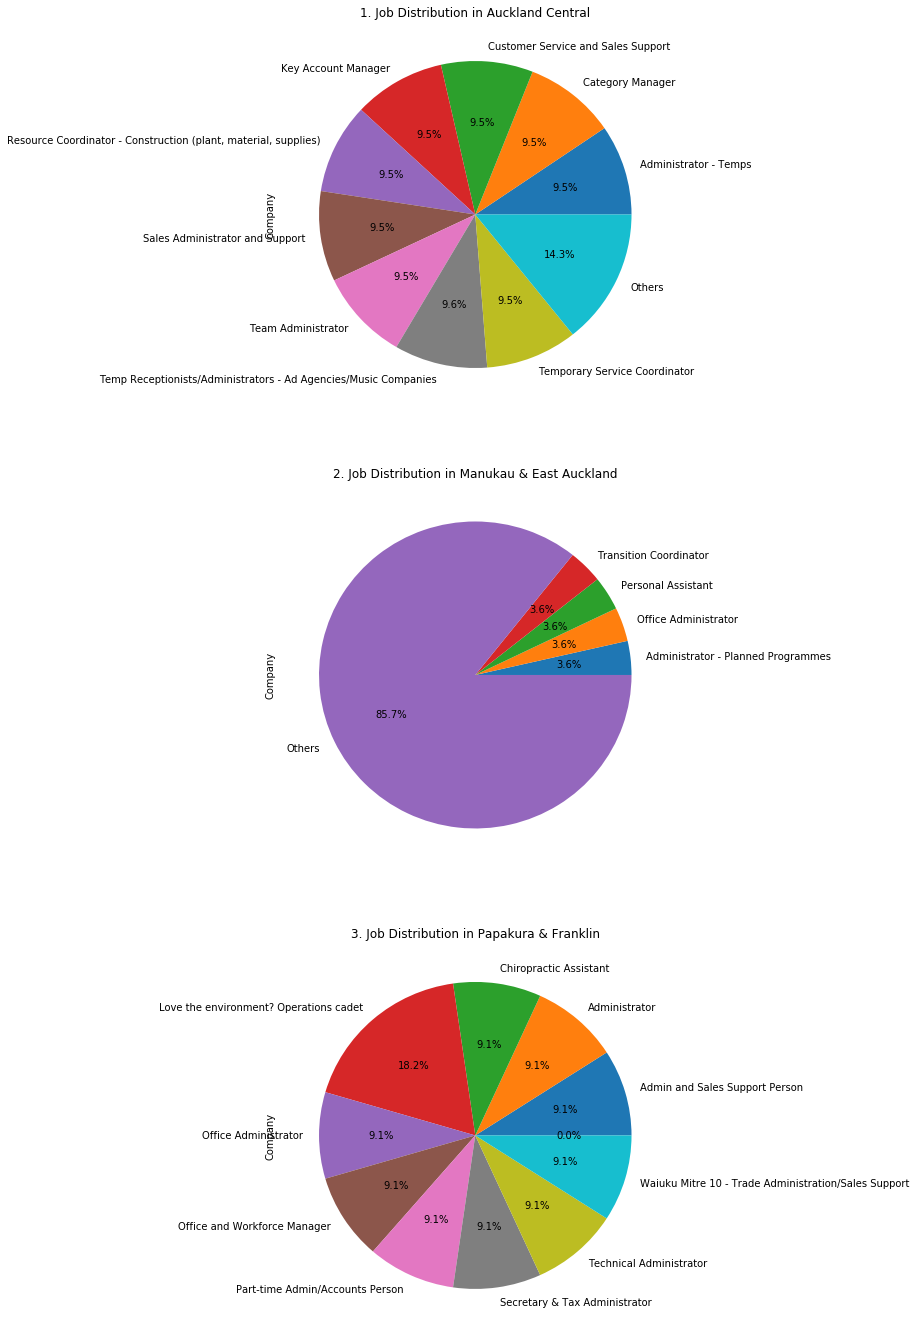

In [20]:
df1 = job_distribution_by_city(df, "Auckland Central", 70)
df2 = job_distribution_by_city(df, "Manukau & East Auckland",2)
df3 = job_distribution_by_city(df, "Papakura & Franklin", 0)

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(7,24))

df1.plot.pie(ax=axes[0],autopct='%1.1f%%')
df2.plot.pie(ax=axes[1],autopct='%1.1f%%')
df3.plot.pie(ax=axes[2],autopct='%1.1f%%')
axes[0].title.set_text('1. Job Distribution in Auckland Central')
axes[1].title.set_text('2. Job Distribution in Manukau & East Auckland')
axes[2].title.set_text('3. Job Distribution in Papakura & Franklin')

### Study from classification

1. Classification shares in the market (pie)

In [21]:
job_counts = df.groupby('Job').count()["Company"]
# job_counts = job_counts.rename(columns={0:'count'}, inplace=True)
job_counts.columns = ["Count"]
job_counts.head()

Job
9 month Fixed Term Contract - Office Administrator - Part-time    1
ACC Contract Coordinator                                          1
ACCOUNTS ADMINISTRATOR                                            1
ACES Administrator                                                1
ADMINISTRATION SPECIALIST - CONSTRUCTION                          1
Name: Company, dtype: int64

In [22]:
job_counts_major = job_counts[job_counts >= 70]
job_counts_major.head()

Job
Administrator - Temps                              70
Business Professional - Temporary Opportunities    70
Category Manager                                   70
Contracts Administrator                            76
Customer Service & Sales Support                   70
Name: Company, dtype: int64

In [23]:
job_counts_minor = job_counts[job_counts < 70].count()
job_counts_minor

527

In [24]:
job_counts_major.loc["Others"] = job_counts_minor
job_counts_major.head()

Job
Administrator - Temps                              70
Business Professional - Temporary Opportunities    70
Category Manager                                   70
Contracts Administrator                            76
Customer Service & Sales Support                   70
Name: Company, dtype: int64

Text(0.5,1,'Job Count Shared in the Market ')

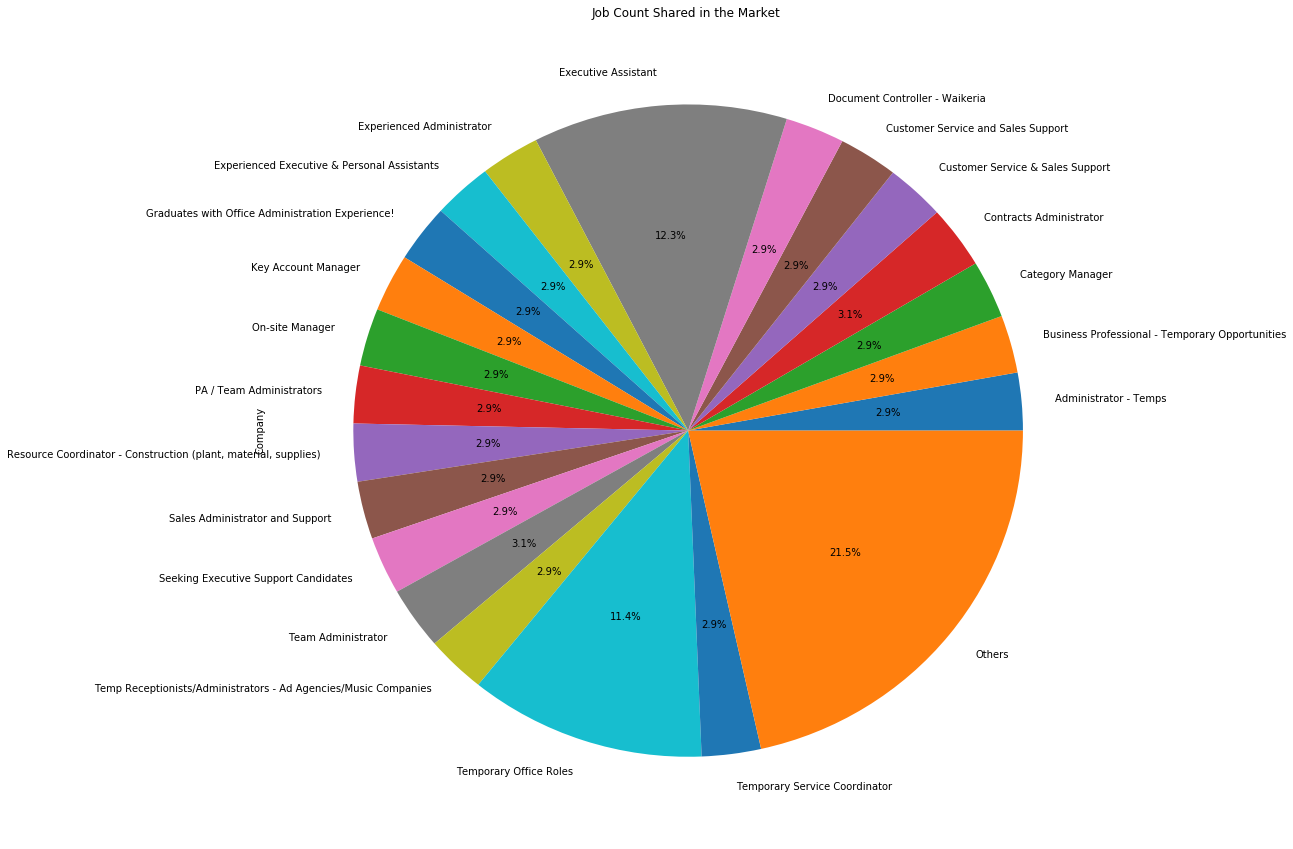

In [25]:
plot = job_counts_major.plot.pie(y='Count',autopct='%1.1f%%',figsize=(15,15))
plt.title('Job Count Shared in the Market ')

2. Sub-classification in one classification (pie)

3. Classification changes over time

### (Future work) predict the trend of the job market